# Classifier les chiffres manuscrits avec tensorflow 

https://www.marktechpost.com/2019/10/16/classify-handwritten-digits-with-tensorflow/

https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Créer une variable 

On crée une variable nommée mnist et on la défini sur un objet de l'ensemble de données MNIST de la bibliothèque Keras Puis, nous allons la transormer en

    un ensemble de données d'entraînement (x_train, y_train) et
    
    un ensemble de données de test (x_test, y_test):

In [3]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

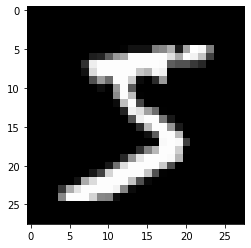

In [4]:
plt.imshow(x_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

# Prétraiter les données => Normalisation

Avant d'introduire les données dans le réseau de neurones, nous devons le normaliser en mettant à l'échelle la valeur des pixels dans une plage de 0 à 1 au lieu d'être de 0 à 255 et cela prend moins de puissance de calcul:

In [5]:
# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Construction du modèle

Maintenant, nous allons construire le modèle cad le réseau de neurones qui va entraîner et apprendre à classer ces images.

Il convient de noter que les couches sont la chose la plus importante dans la construction d'un réseau neuronal artificiel, car elles extrairont les caractéristiques des données.

    Tout d'abord, nous commençons par créer un objet modèle qui vous permet d'ajouter les différentes couches.

    Ensuite, nous allons aplatir les données qui sont les pixels de l'image dans ce cas. Ainsi, les images ont une dimension de 28 × 28, nous devons la rendre 1 × 784 dimensionnelle pour que la couche d'entrée du réseau neuronal puisse la lire ou la gérer. 

    Puis, nous définissons l'entrée et une couche cachée avec 128 neurones et une fonction d'activation via la fonction relu.

    Et la dernière chose que nous créons la couche de sortie avec 10 neurones(chiffres de 0 à 9) et une fonction d'activation softmax qui transformera le score renvoyé par le modèle en une valeur afin qu'il soit interprété par les humains.

In [6]:
#Build the model object
model = tf.keras.models.Sequential()
#les trois étapes pour que le réseau de neurones (Entrée, caché, sortie) puisse lire le fichier
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))#10 correspond aux 10 chiffres de 0à 9, softmax-> classification

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) => on lance 2 fois pour une meilleure prédiction

# Compiler le modèle

Depuis que nous avons fini de construire le réseau neuronal, nous devons compiler le modèle en ajoutant quelques paramètres qui indiqueront au réseau neuronal comment démarrer le processus de formation.

Tout d'abord, nous ajoutons l'optimiseur qui créera ou, en d'autres termes, mettra à jour le paramètre du réseau neuronal pour l'adapter à nos données.

Deuxièmement, la fonction de perte qui vous indiquera les performances de votre modèle.

Troisièmement, les métriques qui donnent des tests indicatifs de la qualité du modèle.



In [7]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

https://keras.io/api/metrics/

# Former le modèle

Nous sommes prêts à entraîner notre modèle, nous appelons le sous-paquet fit et le nourrissons avec les données d'entraînement et les données étiquetées qui correspondent à l'ensemble de données d'apprentissage et combien d'époques doivent être exécutées ou combien de fois doivent faire une estimation.

In [8]:
hist = model.fit(x=x_train, y=y_train, epochs=5, batch_size = 8) # Start training process
hist

Epoch 1/5
7500/7500 [==============================] - 38s 5ms/step - loss: 0.3691 - accuracy: 0.8911
Epoch 2/5
7500/7500 [==============================] - 43s 6ms/step - loss: 0.1014 - accuracy: 0.9677
Epoch 3/5
7500/7500 [==============================] - 46s 6ms/step - loss: 0.0687 - accuracy: 0.9774
Epoch 4/5
7500/7500 [==============================] - 37s 5ms/step - loss: 0.0467 - accuracy: 0.9844
Epoch 5/5
7500/7500 [==============================] - 35s 5ms/step - loss: 0.0376 - accuracy: 0.9890


On remarque que les pertes diminues et l'accuracy augmente au fur et à mesure

epochs nombre de fois où l'on parcourt la base de données (pour 100 images 100 itérations 1 époch)
batch parcourt 4 images à la fois.(pour 100 images 25 itérations et 1 époch)
ici 5 epoch

In [9]:
model.save('mnist.h5')

c'est le résultat de l'entrainement. Action qui enregistre les poids

# Evaluer le modèle

In [10]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0999 - accuracy: 0.9730

Test accuracy: 0.9729999899864197


précision de + de 97,2% plutôt performante 

# Prédictions

In [11]:
predictions = model.predict([x_test]) # Make prediction

Consider rewriting this model with the Functional API.


In [12]:
print(np.argmax(predictions[1000])) # Print out the number

9


la prédiction est le 9, 
mais comment pouvons-nous nous assurer que cette prédiction était vraie? 
ON teste la 1000e image dans l'ensemble de données de test à l'aide de matplotlib:

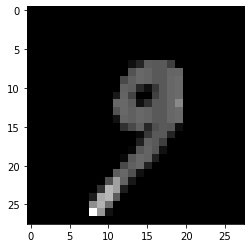

In [13]:
plt.imshow(x_test[1000], cmap="gray") # Import the image
plt.show() # Show the image

Les prédictions correspondent à l'image victoire !

# APPLICATION tkinter

In [2]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "black", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        
        plt.imshow(im, cmap="gray") # Import the image
        plt.show() # Show the image    
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=12#rayon du pinceau
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='white', outline ='white')

app = App()
mainloop()

# test ayant servi pour les étapes précédentes archive

In [ ]:
#1. Import the libraries and load the dataset

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

#2. Preprocess the data

batch_size = 128
num_classes = 10
epochs = 10

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#3. Create the model



model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

#4. Train the model

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

#5. Evaluate the model

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 353s 747ms/step - loss: 2.2864 - accuracy: 0.1383 - val_loss: 2.2265 - val_accuracy: 0.4612
Epoch 2/10
469/469 [==============================] - 314s 669ms/step - loss: 2.2207 - accuracy: 0.2773 - val_loss: 2.1364 - val_accuracy: 0.5995
Epoch 3/10
469/469 [==============================] - 343s 732ms/step - loss: 2.1305 - accuracy: 0.4029 - val_loss: 2.0037 - val_accuracy: 0.6677
Epoch 4/10
469/469 [==============================] - 397s 847ms/step - loss: 1.9989 - accuracy: 0.5075 - val_loss: 1.8128 - val_accuracy: 0.7247
Epoch 5/10
469/469 [==============================] - 329s 700ms/step - loss: 1.8150 - accuracy: 0.5792 - val_loss: 1.5682 - val_accuracy: 0.7675
Epoch 6/10
469/469 [==============================] - 346s 738ms/step - loss: 1.5942 - accuracy: 0.6266 - val_loss: 1.3065 - val_accuracy: 0.7935
Epoch 7/10
165/469 [======